In [3]:
# 1. Data Loading and Initial Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib
import time
import warnings


In [4]:
# Load the dataset
df = pd.read_csv('d:/gradious/mobile games data.csv')

In [5]:
df.head()

,title_name,device_type,launch_year,game_genre,publisher_name,sales_usa,sales_europe,sales_asia,sales_misc,sales_total
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
df.tail()

,title_name,device_type,launch_year,game_genre,publisher_name,sales_usa,sales_europe,sales_asia,sales_misc,sales_total
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title_name      16598 non-null  object 
 1   device_type     16598 non-null  object 
 2   launch_year     16327 non-null  float64
 3   game_genre      16598 non-null  object 
 4   publisher_name  16540 non-null  object 
 5   sales_usa       16598 non-null  float64
 6   sales_europe    16598 non-null  float64
 7   sales_asia      16598 non-null  float64
 8   sales_misc      16598 non-null  float64
 9   sales_total     16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [8]:
df.describe(include='object')

,title_name,device_type,game_genre,publisher_name
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [9]:
df.describe()

,launch_year,sales_usa,sales_europe,sales_asia,sales_misc,sales_total
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [10]:
df.isnull().sum()

title_name          0
device_type         0
launch_year       271
game_genre          0
publisher_name     58
sales_usa           0
sales_europe        0
sales_asia          0
sales_misc          0
sales_total         0
dtype: int64

In [11]:
median_launch_year=df['launch_year'].median()
df.fillna(median_launch_year, inplace=True)

In [12]:
df.drop(columns=['publisher_name'], inplace=True)

In [13]:
df.isnull().sum()

title_name      0
device_type     0
launch_year     0
game_genre      0
sales_usa       0
sales_europe    0
sales_asia      0
sales_misc      0
sales_total     0
dtype: int64

In [14]:
df.head()

,title_name,device_type,launch_year,game_genre,sales_usa,sales_europe,sales_asia,sales_misc,sales_total
0,Wii Sports,Wii,2006.0,Sports,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37


In [15]:
# 3. Feature Engineering & EDA
def create_ratio(df, numerator, denominator):
    """Create ratio features with safe division"""
    ratio = np.divide(
        df[numerator], 
        df[denominator],
        out=np.zeros_like(df[numerator]),
        where=df[denominator] != 0
    )
    return np.where(np.isinf(ratio), 0, ratio)


In [16]:
# Create target variable
df['log_sales_total'] = np.log1p(df['sales_total'])

# Create ratio features
df['usa_ratio'] = create_ratio(df, 'sales_usa', 'sales_total')
df['europe_ratio'] = create_ratio(df, 'sales_europe', 'sales_total')
df['asia_ratio'] = create_ratio(df, 'sales_asia', 'sales_total')
df['misc_ratio'] = create_ratio(df, 'sales_misc', 'sales_total')

# Create temporal feature
df['years_since_1980'] = df['launch_year'] - 1980


In [17]:
# Group rare categories
def group_rare_categories(df, column, threshold=100):
    counts = df[column].value_counts()
    rare_categories = counts[counts < threshold].index
    return df[column].replace(rare_categories, 'Other')

df['device_type'] = group_rare_categories(df, 'device_type', 100)
df['game_genre'] = group_rare_categories(df, 'game_genre', 50)


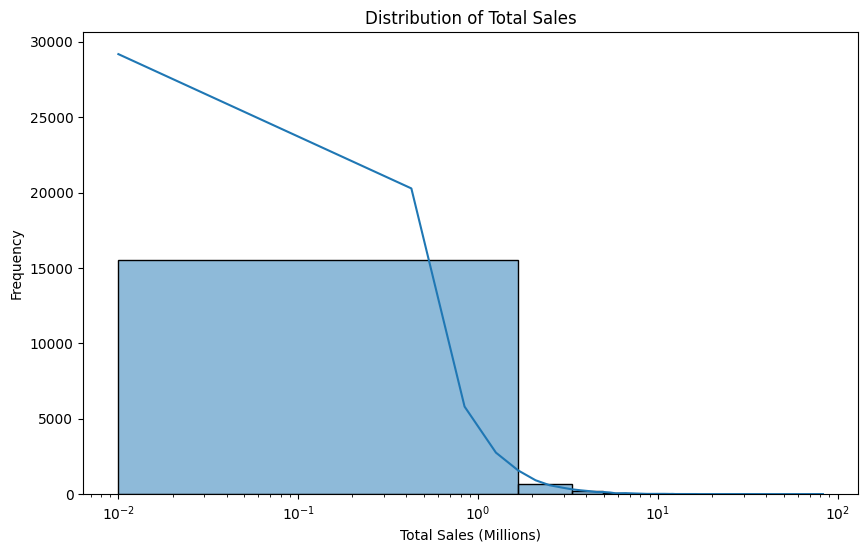

Sales Total Skewness: 17.40


In [18]:
#EDA
#visualize sales total distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sales_total'], bins=50, kde=True)
plt.xscale('log')
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales (Millions)')
plt.ylabel('Frequency')
plt.show()
print(f"Sales Total Skewness: {df['sales_total'].skew():.2f}")

        launch_year     sales_usa  sales_europe    sales_asia    sales_misc  \
count  16598.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    2006.416134      0.264667      0.146652      0.077782      0.048063   
std        5.781686      0.816683      0.505351      0.309291      0.188588   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2010.000000      0.240000      0.110000      0.040000      0.040000   
max     2020.000000     41.490000     29.020000     10.220000     10.570000   

        sales_total  
count  16598.000000  
mean       0.537441  
std        1.555028  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.470000  
max       82.740000  


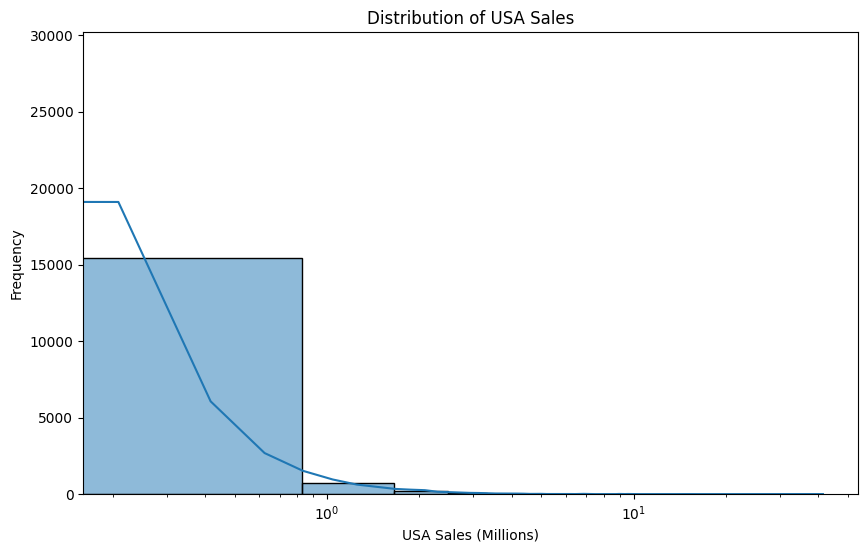

In [19]:
#Numerical Features Visualization
numerical_features = ['launch_year', 'sales_usa', 'sales_europe', 'sales_asia', 'sales_misc', 'sales_total']
print(df[numerical_features].describe())
plt.figure(figsize=(10, 6))
sns.histplot(df['sales_usa'], bins=50, kde=True)
plt.xscale('log')
plt.title('Distribution of USA Sales')
plt.xlabel('USA Sales (Millions)')
plt.ylabel('Frequency')
plt.show()

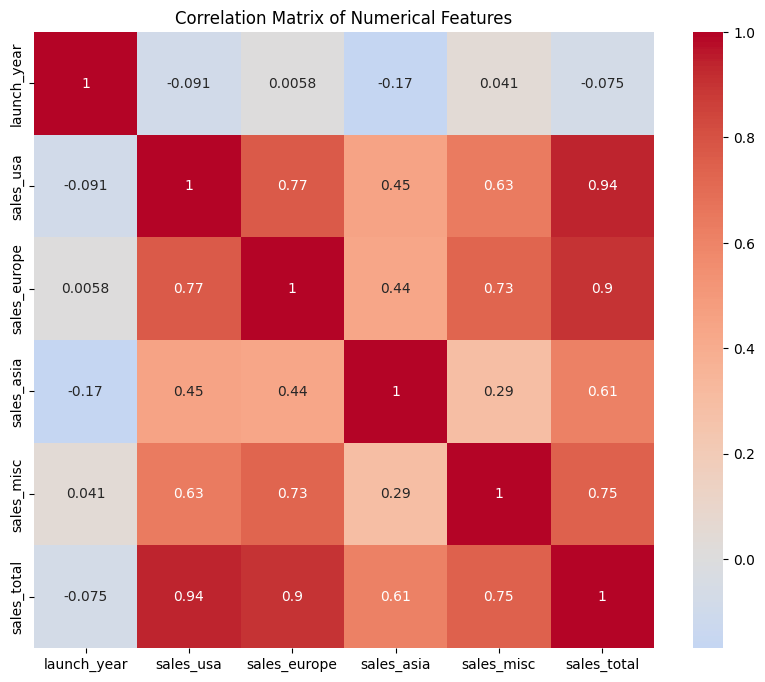

In [20]:
#Correlation Analysis For  Numerical Features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

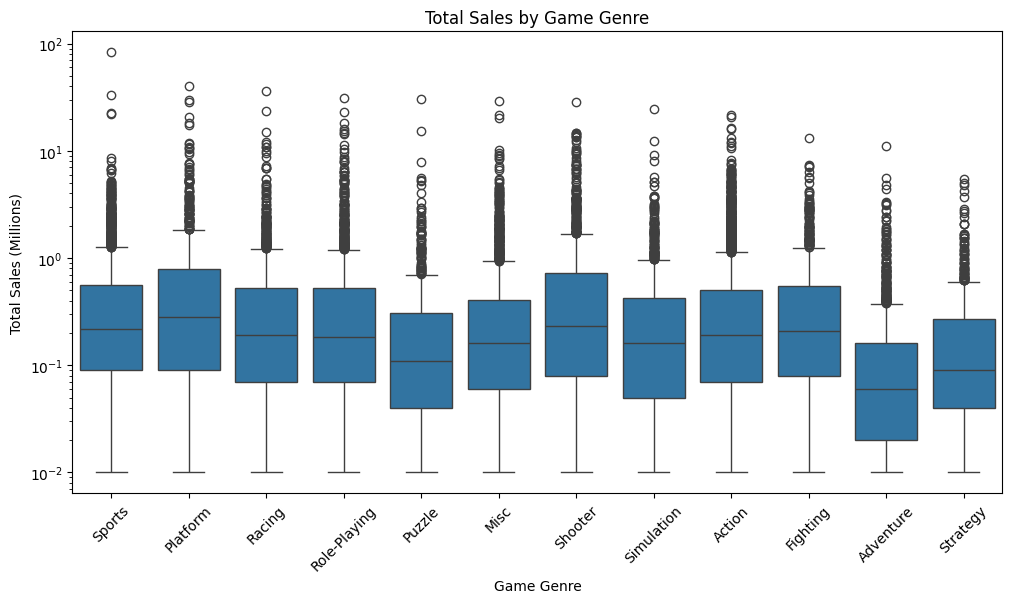

In [21]:
#Dependency of sales_total on game_genre and device_type
plt.figure(figsize=(12, 6))
sns.boxplot(x='game_genre', y='sales_total', data=df)
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Total Sales by Game Genre')
plt.xlabel('Game Genre')
plt.ylabel('Total Sales (Millions)')
plt.show()

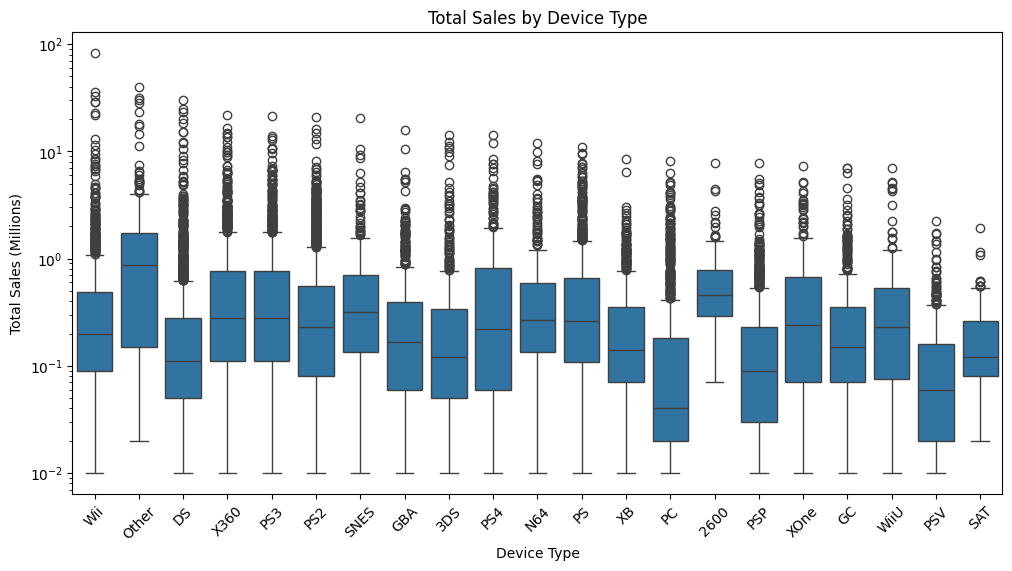

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='device_type', y='sales_total', data=df)
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Total Sales by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Total Sales (Millions)')
plt.show()

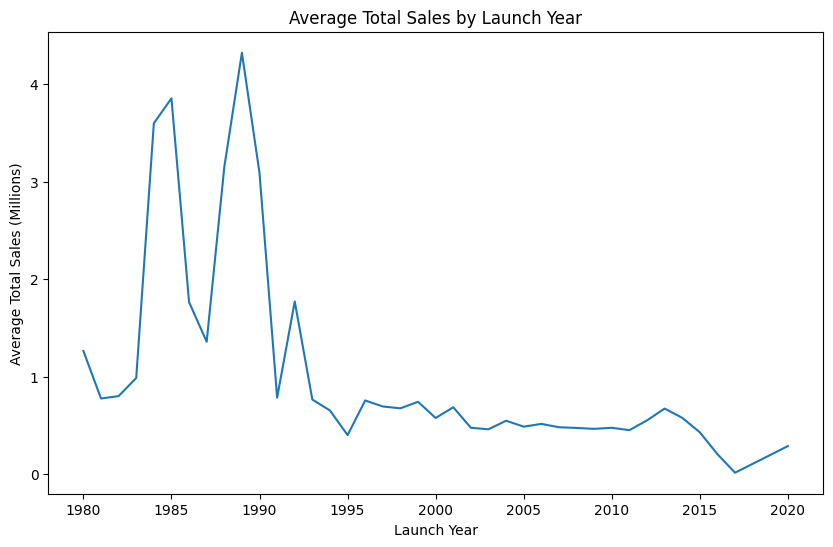

In [23]:
#Market Trends by sales_total and launch_year
plt.figure(figsize=(10, 6))
sns.lineplot(x='launch_year', y='sales_total', 
             data=df.groupby('launch_year')['sales_total'].mean().reset_index())
plt.title('Average Total Sales by Launch Year')
plt.xlabel('Launch Year')
plt.ylabel('Average Total Sales (Millions)')
plt.show()

In [21]:
# 5. Data Preparation
# Define features to keep
features_to_keep = [
    'device_type', 'game_genre', 'usa_ratio', 'europe_ratio', 
    'asia_ratio', 'misc_ratio', 'years_since_1980'
]

# Create final dataset
X = df[features_to_keep]
y = df['log_sales_total']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=pd.qcut(y, q=10)
)


In [22]:
# 6. Preprocessing Pipeline
# Define categorical and numerical features
categorical_features = ['device_type', 'game_genre']
numerical_features = ['usa_ratio', 'europe_ratio', 'asia_ratio', 'misc_ratio', 'years_since_1980']

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [23]:
# 7. Model Training with Enhanced Setup
models = {
    'XGBoost': XGBRegressor(random_state=42, tree_method='hist', device='cuda'),
    'RandomForest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42, device='gpu')
}

param_grids = {
    'XGBoost': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [3, 5, 7],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0]
    },
    'RandomForest': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5, 10],
        'model__max_features': ['sqrt', 'log2', 0.8]
    },
    'GradientBoosting': {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__max_depth': [3, 5, 7],
        'model__subsample': [0.8, 1.0],
        'model__max_features': ['sqrt', 'log2']
    },
    'LightGBM': {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__num_leaves': [31, 63, 127],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0]
    }
}

In [24]:
# 8. Model Training and Evaluation
results = {}
best_model = None
best_score = float('inf')

for name, model in models.items():
    print(f"\n{'-'*40}")
    print(f"Training {name}")
    print(f"{'-'*40}")
    
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Randomized search
    random_search = RandomizedSearchCV(
        pipeline, 
        param_distributions=param_grids[name],
        n_iter=15,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1 if name != 'XGBoost' else 1,  # XGBoost GPU doesn't work well with n_jobs
        random_state=42,
        verbose=1
    )
    
    # Train model
    random_search.fit(X_train, y_train)
    
    # Get best model
    best_estimator = random_search.best_estimator_
    training_time = time.time() - start_time
    
    # Save model
    joblib.dump(best_estimator, f'{name.lower()}_model.pkl')
    
    # Evaluate on test set
    y_pred = best_estimator.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'model': best_estimator,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'training_time': training_time,
        'best_params': random_search.best_params_
    }
    
    # Print results
    print(f"\n{name} Results:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²: {r2:.4f}")
    print(f"  Training time: {training_time:.2f} seconds")
    print(f"  Best params: {random_search.best_params_}")
    
    # Update best model
    if rmse < best_score:
        best_score = rmse
        best_model = name


----------------------------------------
Training XGBoost
----------------------------------------
Fitting 3 folds for each of 15 candidates, totalling 45 fits


c:\Users\defaultuser0\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:729: UserWarning: [15:50:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)



XGBoost Results:
  RMSE: 0.2253
  MAE: 0.1283
  R²: 0.6581
  Training time: 128.05 seconds
  Best params: {'model__subsample': 1.0, 'model__n_estimators': 200, 'model__max_depth': 5, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.8}

----------------------------------------
Training RandomForest
----------------------------------------
Fitting 3 folds for each of 15 candidates, totalling 45 fits

RandomForest Results:
  RMSE: 0.2094
  MAE: 0.1110
  R²: 0.7046
  Training time: 91.35 seconds
  Best params: {'model__n_estimators': 200, 'model__min_samples_split': 5, 'model__max_features': 0.8, 'model__max_depth': None}

----------------------------------------
Training GradientBoosting
----------------------------------------
Fitting 3 folds for each of 15 candidates, totalling 45 fits

GradientBoosting Results:
  RMSE: 0.2226
  MAE: 0.1323
  R²: 0.6662
  Training time: 39.86 seconds
  Best params: {'model__subsample': 1.0, 'model__n_estimators': 300, 'model__max_features': 'l

c:\Users\defaultuser0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



Model Comparison:
              Model      RMSE       MAE        R²  Training Time (s)
1      RandomForest  0.209434  0.110988  0.704552          91.354992
3          LightGBM  0.210129  0.117276  0.702590        1651.030139
2  GradientBoosting  0.222600  0.132326  0.666239          39.856104
0           XGBoost  0.225284  0.128335  0.658143         128.046338


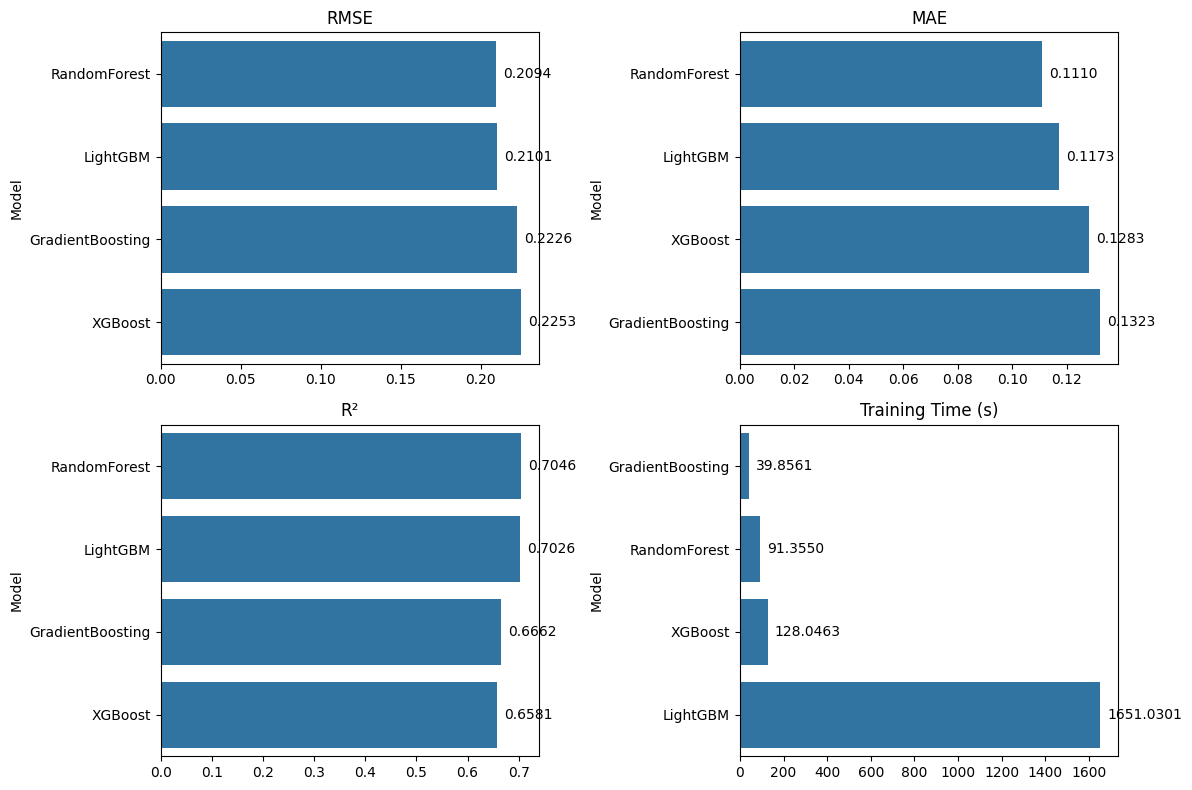

In [25]:
# 9. Results Comparison
print("\nModel Comparison:")
comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'RMSE': [results[name]['rmse'] for name in results],
    'MAE': [results[name]['mae'] for name in results],
    'R²': [results[name]['r2'] for name in results],
    'Training Time (s)': [results[name]['training_time'] for name in results]
}).sort_values(by='RMSE')

print(comparison)

# Visual comparison
plt.figure(figsize=(12, 8))
metrics = ['RMSE', 'MAE', 'R²', 'Training Time (s)']
positions = range(len(metrics))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sorted_df = comparison.sort_values(by=metric, ascending=(metric != 'R²'))
    ax = sns.barplot(x=metric, y='Model', data=sorted_df)
    plt.title(metric)
    plt.xlabel('')
    
    # Add values to bars
    for p in ax.patches:
        width = p.get_width()
        plt.annotate(f'{width:.4f}', (width, p.get_y() + p.get_height()/2),
                     ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300)
plt.show()


C:\Users\defaultuser0\AppData\Local\Temp\ipykernel_21792\2254404462.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
C:\Users\defaultuser0\AppData\Local\Temp\ipykernel_21792\2254404462.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
C:\Users\defaultuser0\AppData\Local\Temp\ipykernel_21792\2254404462.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df,

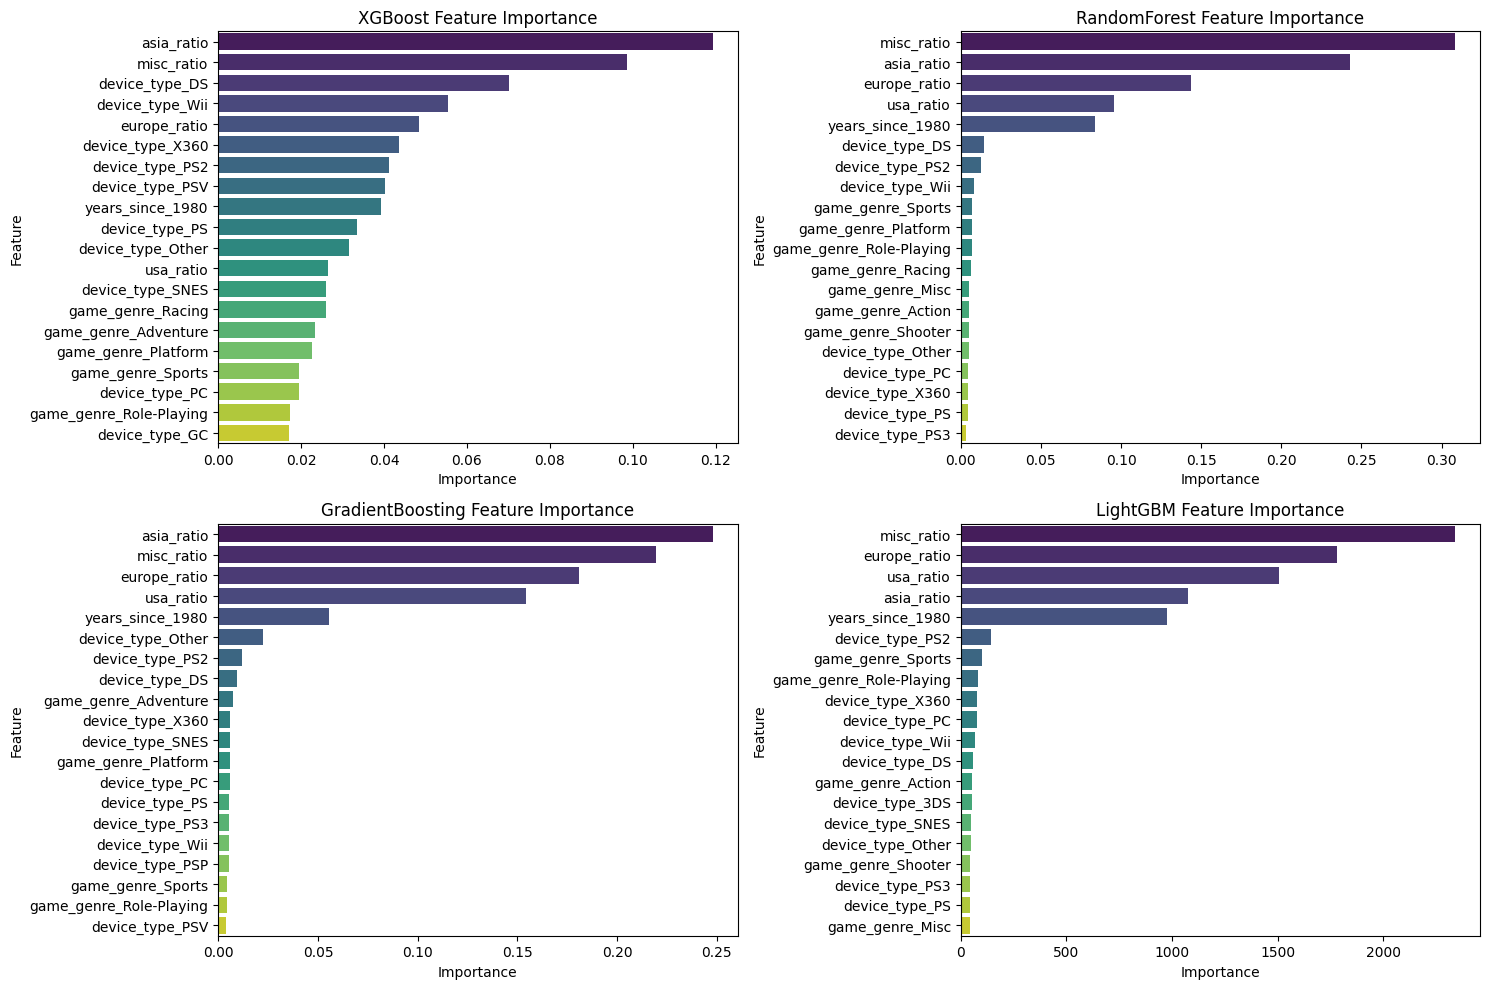

In [26]:
# 10. Feature Importance Analysis
plt.figure(figsize=(15, 10))
for i, (name, result) in enumerate(results.items(), 1):
    model = result['model']
    
    # Check if model supports feature importances
    if hasattr(model.named_steps['model'], 'feature_importances_'):
        # Get feature names
        preprocessor = model.named_steps['preprocessor']
        num_features = numerical_features
        cat_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
        all_features = np.concatenate([num_features, cat_features])
        
        # Get importances
        importances = model.named_steps['model'].feature_importances_
        
        # Create importance dataframe
        importance_df = pd.DataFrame({
            'Feature': all_features,
            'Importance': importances
        }).sort_values('Importance', ascending=False).head(20)
        
        # Plot
        plt.subplot(2, 2, i)
        sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
        plt.title(f'{name} Feature Importance')
        plt.tight_layout()

plt.savefig('feature_importances.png', dpi=300)
plt.show()

In [27]:
# 11. Final Model Deployment
if best_model:
    final_model = results[best_model]['model']
    print(f"Best Model: {best_model} with RMSE: {best_score:.4f}")
    
   

Best Model: RandomForest with RMSE: 0.2094
